In [1]:
from pyenzyme.enzymeml.tools import EnzymeMLReader
import seaborn as sns
import matplotlib.pyplot as plt

In [63]:
#basic settings visualisation
sns.set_theme(style="whitegrid", palette ='bright',color_codes=True, context = 'notebook')

In [64]:
# Der EnzymeMLReader liest das Dokument für die aus und
# speichert alle Informationen in einem objekt-basierten 
# System. Du kannst von hier aus alles abrufen
enzmldoc = EnzymeMLReader().readFromFile('pyenzyme/Resources/Examples/ThinLayers/COPASI/3IZNOK_TEST/3IZNOK_TEST.omex')

# Die Print Funktion gibt dir eine Übersicht über das Dokument
print(enzmldoc)

>>> Units
	ID: u0 	 Name: l
	ID: u1 	 Name: uM
	ID: u2 	 Name: mM
	ID: u3 	 Name: K
	ID: u4 	 Name:  / s
	ID: u5 	 Name: mmole / l
>>> Reactants
	ID: s0 	 Name: indole
	ID: s1 	 Name: O-phospho-L-serine
	ID: s2 	 Name: L-Tryptophan
	ID: s3 	 Name: HPO4(2-)
>>> Proteins
	ID: p0 	 Name: TrpB2o from Arabidopsis thaliana 10.0 microM
>>> Reactions
	ID: r0 	 Name: steady-state kinetics with TrpB2o from Arabidopsis thaliana PConc: 10.00 uM


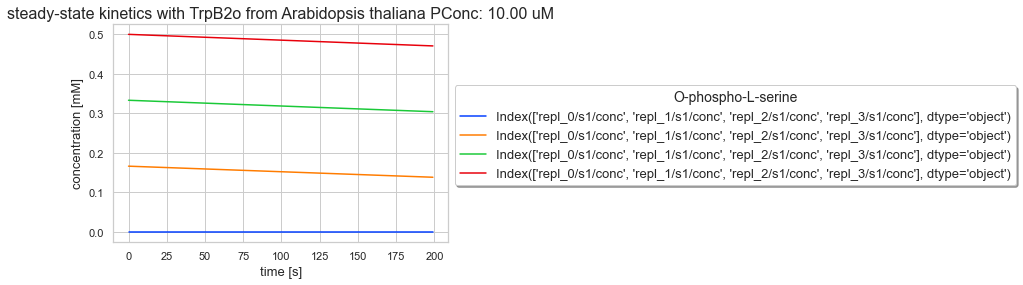

In [96]:
for id_, reac in enzmldoc.getReactionDict().items():
    
    # Iteriert über alle Reaktionen
    
    # reac: Reaction Objekt
    # id_: IDentifier
    
    reaction_name = reac.getName()
    #### Educts ####
    for reactant_id, stoich, _, replicates, init_conc in reac.getEducts():
        
        # Aus dem Edukt folgt Tuple: 
        # Reactant ID, Stöchio, Constant, Replikate, Initial-Konzentrationen
        
        if len(replicates) > 0:
            
            df = reac.exportReplicates(reactant_id)
            time_val = df.index.tolist()
            time = df.index.name.split('/')[0]
            time_unit = df.index.name.split('/')[1]
            
            # Visualisation
            for col in df.columns:
                
                name = enzmldoc.getReactant(col.split('/')[1]).getName()
                unit = enzmldoc.getReactant(col.split('/')[1]).getSubstanceUnits()
                unit_name = enzmldoc.getUnitDict()[unit].getName()
                
                ax= sns.lineplot( x=time_val, y=df[col], label = df.columns )
            
                #set graph title, legend, axes 
                
                ax.set_title(reaction_name, fontsize = 16)
                
                ax.legend(fontsize = 13, \
                           bbox_to_anchor= (1, 0.75), \
                           title= name, \
                           title_fontsize = 14, \
                           shadow = True, \
                           facecolor = 'white');

                xlabel = f"{time} [{time_unit}]"
                ylabel = f"{'concentration'} [{unit_name}]"
                
                ax.set_xlabel(xlabel , fontsize=13)
                ax.set_ylabel(ylabel, fontsize=13)
                
                #save as pdf
                
                fname = f"{id_}_{name}_Educt.pdf"
                plt.savefig(fname,dpi=300,bbox_inches = 'tight')
#print(df.columns[1])
 
    #### Products ####
    for reactant_id, stoich, _, replicates, init_conc in reac.getProducts():
        
        # Aus dem Edukt folgt Tuple: 
        # Reactant ID, Stöchio, Constant, Replikate, Initial-Konzentrationen
        
        if len(replicates) > 0:
            
            df = reac.exportReplicates(reactant_id)
            time_val = df.index.tolist()
            time = df.index.name.split('/')[0]
            time_unit = df.index.name.split('/')[1]
            
            # Visualisation
            for col in df.columns:
                
                name = enzmldoc.getReactant(col.split('/')[1]).getName()
                unit = enzmldoc.getReactant(col.split('/')[1]).getSubstanceUnits()
                unit_name = enzmldoc.getUnitDict()[unit].getName()
                
                ax= sns.lineplot( x=time_val, y=df[col], label = df.columns )
            
                #set graph title, legend, axes 
                
                ax.set_title(reaction_name, fontsize = 16)
                
                ax.legend(fontsize = 13, \
                           bbox_to_anchor= (1, 0.75), \
                           title= name, \
                           title_fontsize = 14, \
                           shadow = True, \
                           facecolor = 'white');

                xlabel = f"{time} [{time_unit}]"
                ylabel = f"{'concentration'} [{unit_name}]"
                
                ax.set_xlabel(xlabel , fontsize=13)
                ax.set_ylabel(ylabel, fontsize=13)
                
                #save as pdf
                
                fname = f"{id_}_{name}_Product.pdf"
                plt.savefig(fname,dpi=300,bbox_inches = 'tight')
                
 #### Modifiers ####
    for reactant_id, stoich, _, replicates, init_conc in reac.getModifiers():
        
        # Aus dem Edukt folgt Tuple: 
        # Reactant ID, Stöchio, Constant, Replikate, Initial-Konzentrationen
        
        if len(replicates) > 0:
            
            df = reac.exportReplicates(reactant_id)
            time_val = df.index.tolist()
            time = df.index.name.split('/')[0]
            time_unit = df.index.name.split('/')[1]
            
            # Visualisation
            for col in df.columns:
                
                name = enzmldoc.getReactant(col.split('/')[1]).getName()
                unit = enzmldoc.getReactant(col.split('/')[1]).getSubstanceUnits()
                unit_name = enzmldoc.getUnitDict()[unit].getName()
                
                ax= sns.lineplot( x=time_val, y=df[col], label = df.columns )
            
                #set graph title, legend, axes 
                
                ax.set_title(reaction_name, fontsize = 16)
                
                ax.legend(fontsize = 13, \
                           bbox_to_anchor= (1, 0.75), \
                           title= name, \
                           title_fontsize = 14, \
                           shadow = True, \
                           facecolor = 'white');

                xlabel = f"{time} [{time_unit}]"
                ylabel = f"{'concentration'} [{unit_name}]"
                
                ax.set_xlabel(xlabel , fontsize=13)
                ax.set_ylabel(ylabel, fontsize=13)
                
                #save as pdf
                
                fname = f"{id_}_{name}_Modifiers.pdf"
                plt.savefig(fname,dpi=300,bbox_inches = 'tight')